# Data Analytics (Part1)

In [20]:
!pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv('SuperStoreOrders.csv', encoding='ISO-8859-1')
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,2011
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,2011
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High,2011
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,31-12-2014,04-01-2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,05-01-2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,31-12-2014,02-01-2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,06-01-2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [74]:
df['sales'] = df['sales'].str.replace(',', '') 
df['sales'] = df['sales'].astype(int)

In [75]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)
df['quarter'] = df['order_date'].dt.quarter

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  object        
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  int64         
 15  qu

In [77]:
df.describe()

,order_date,sales,quantity,discount,profit,shipping_cost,year,quarter
count,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-05-11 21:26:49.155780864,246.498440,3.476545,0.142908,28.641740,26.375915,2012.777208,2.793235
min,2011-01-01 00:00:00,0.000000,1.000000,0.000000,-6599.978000,0.000000,2011.000000,1.000000
25%,2012-06-19 00:00:00,31.000000,2.000000,0.000000,0.000000,2.610000,2012.000000,2.000000
50%,2013-07-08 00:00:00,85.000000,3.000000,0.000000,9.240000,7.790000,2013.000000,3.000000
75%,2014-05-22 00:00:00,251.000000,5.000000,0.200000,36.810000,24.450000,2014.000000,4.000000
max,2014-12-31 00:00:00,22638.000000,14.000000,0.850000,8399.976000,933.570000,2014.000000,4.000000
std,NaN,487.567175,2.278766,0.212280,174.424113,57.296804,1.098931,1.066015


In [11]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [13]:
df.isnull().value_counts()

order_id  order_date  ship_date  ship_mode  customer_name  segment  state  country  market  region  product_id  category  sub_category  product_name  sales  quantity  discount  profit  shipping_cost  order_priority  year 
False     False       False      False      False          False    False  False    False   False   False       False     False         False         False  False     False     False   False          False           False    51290
Name: count, dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [24]:
df = df.drop(columns=['order_id', 'customer_name'])
df

,order_date,ship_date,ship_mode,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,01-01-2011,06-01-2011,Standard Class,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,2011
1,01-01-2011,08-01-2011,Standard Class,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011
2,01-01-2011,05-01-2011,Second Class,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,2011
3,01-01-2011,05-01-2011,Second Class,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High,2011
4,01-01-2011,08-01-2011,Standard Class,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,31-12-2014,04-01-2015,Standard Class,Corporate,California,United States,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,31-12-2014,05-01-2015,Standard Class,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,31-12-2014,02-01-2015,Second Class,Consumer,Managua,Nicaragua,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,31-12-2014,06-01-2015,Standard Class,Consumer,Chihuahua,Mexico,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_date      51290 non-null  datetime64[ns]
 1   ship_date       51290 non-null  object        
 2   ship_mode       51290 non-null  object        
 3   segment         51290 non-null  object        
 4   state           51290 non-null  object        
 5   country         51290 non-null  object        
 6   market          51290 non-null  object        
 7   region          51290 non-null  object        
 8   product_id      51290 non-null  object        
 9   category        51290 non-null  object        
 10  sub_category    51290 non-null  object        
 11  product_name    51290 non-null  object        
 12  sales           51290 non-null  int64         
 13  quantity        51290 non-null  int64         
 14  discount        51290 non-null  float64       
 15  pr

## EDA

### Sales & Profit By Date

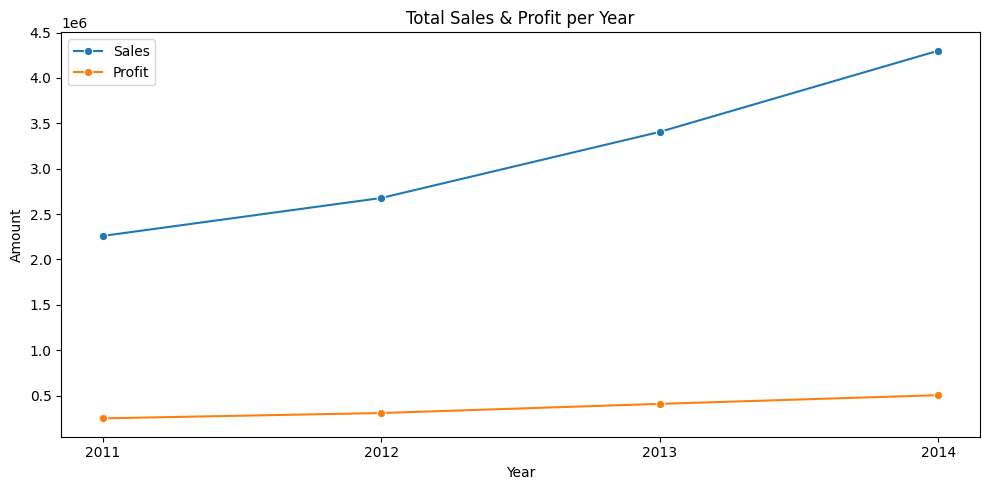

In [53]:
yearly = df.groupby('year')[['sales', 'profit']].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=yearly, x='year', y='sales', label='Sales', marker='o')
sns.lineplot(data=yearly, x='year', y='profit', label='Profit', marker='o')
plt.title('Total Sales & Profit per Year')
plt.ylabel('Amount')
plt.xlabel('Year')
plt.legend()

plt.xticks(ticks=yearly['year'], labels=yearly['year'])

plt.tight_layout()
plt.show()

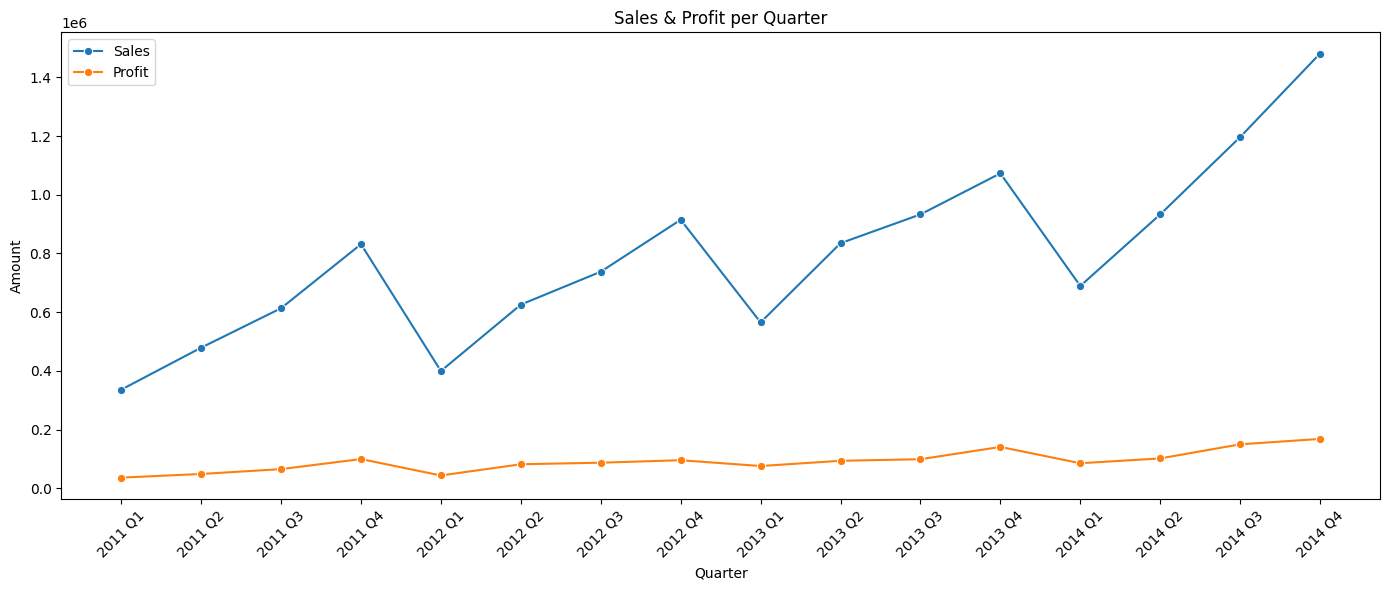

In [ ]:
# INI GPT

df['year'] = df['order_date'].dt.year
df['quarter'] = df['order_date'].dt.quarter

df['year_quarter'] = df['year'].astype(str) + ' Q' + df['quarter'].astype(str)

q_summary = df.groupby('year_quarter')[['sales', 'profit']].sum().reset_index()

q_summary['order'] = df['order_date'].dt.to_period('Q').astype(str)
q_summary = q_summary.sort_values(by='order')

plt.figure(figsize=(14, 6))
sns.lineplot(data=q_summary, x='year_quarter', y='sales', label='Sales', marker='o')
sns.lineplot(data=q_summary, x='year_quarter', y='profit', label='Profit', marker='o')
plt.title('Sales & Profit per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Sales by Segment

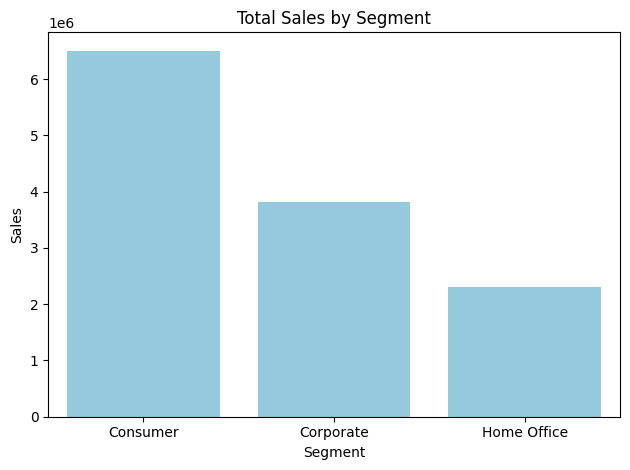

In [38]:
segment = df.groupby('segment')[['sales', 'profit']].sum().reset_index()

plt.figure()
sns.barplot(data=segment, x='segment', y='sales', color='skyblue')
plt.title('Total Sales by Segment')
plt.ylabel('Sales')
plt.xlabel('Segment')
plt.tight_layout()
plt.show()

### Profit by Category

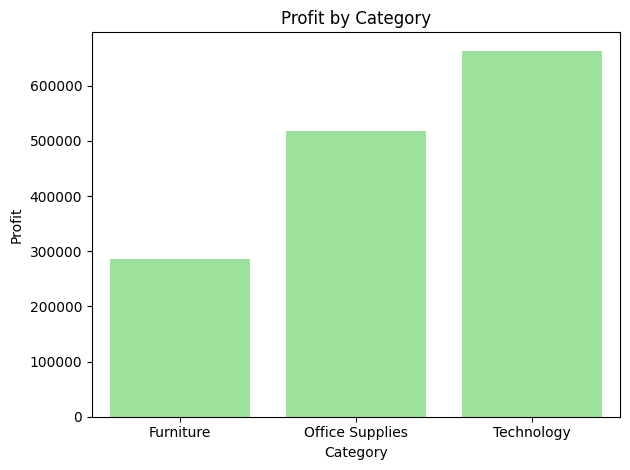

In [39]:
category = df.groupby('category')[['sales', 'profit']].sum().reset_index()

plt.figure()
sns.barplot(data=category, x='category', y='profit', color='lightgreen')
plt.title('Profit by Category')
plt.ylabel('Profit')
plt.xlabel('Category')
plt.tight_layout()
plt.show()


### Profit by Sub-Category

C:\Users\71486\AppData\Local\Temp\ipykernel_24240\2941939866.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_subcats, y='sub_category', x='profit', palette='viridis')


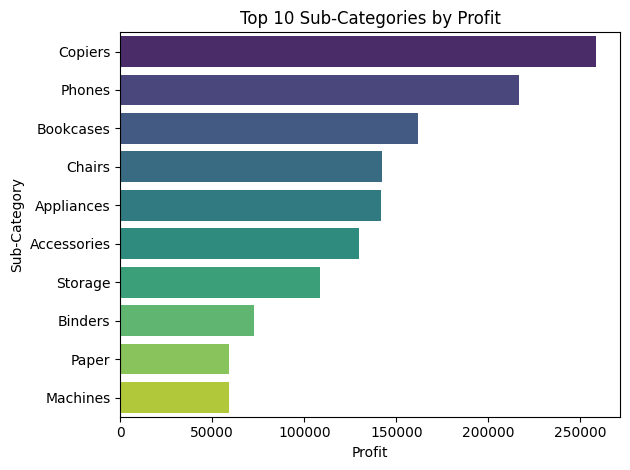

In [40]:
top_subcats = df.groupby('sub_category')[['sales', 'profit']].sum().sort_values('profit', ascending=False).head(10).reset_index()

plt.figure()
sns.barplot(data=top_subcats, y='sub_category', x='profit', palette='viridis')
plt.title('Top 10 Sub-Categories by Profit')
plt.xlabel('Profit')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()

### Top Sales by Product

C:\Users\71486\AppData\Local\Temp\ipykernel_24240\1659841642.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, y='product_name', x='sales', palette='viridis')


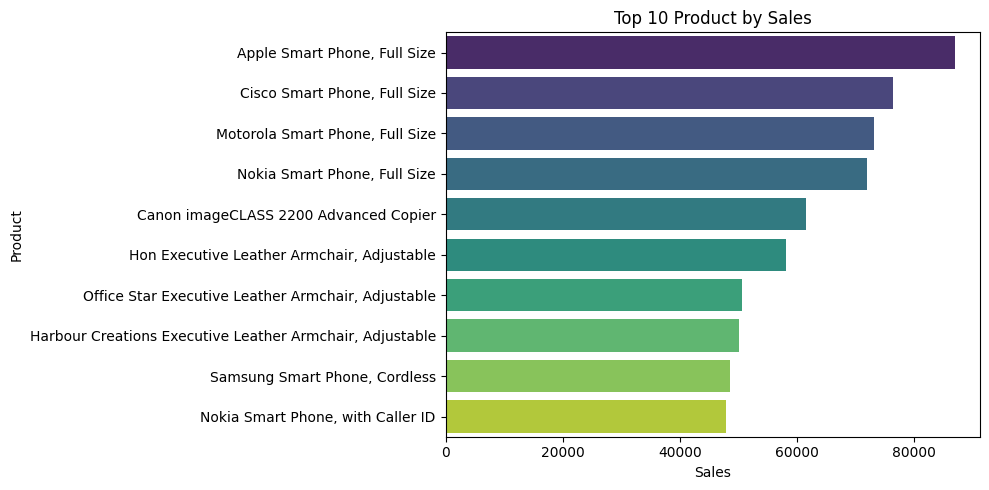

In [48]:
top_products = df.groupby('product_name')[['sales', 'profit']].sum().sort_values('sales', ascending=False).head(10).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=top_products, y='product_name', x='sales', palette='viridis')
plt.title('Top 10 Product by Sales')
plt.xlabel('Sales')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

### Distribusi Profit

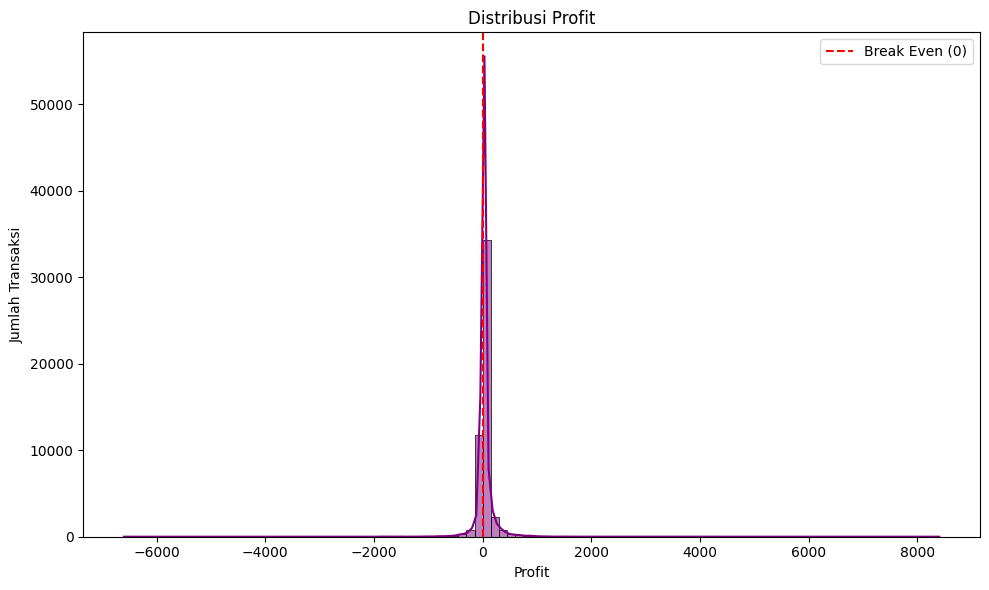

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(df['profit'], bins=100, kde=True, color='purple')
plt.title('Distribusi Profit')
plt.xlabel('Profit')
plt.ylabel('Jumlah Transaksi')
plt.axvline(0, color='red', linestyle='--', label='Break Even (0)')
plt.legend()
plt.tight_layout()
plt.show()


In [82]:
df[df['profit'] > 0].value_counts()

order_id      order_date  ship_date   ship_mode       customer_name    segment      state        country  market  region  product_id        category         sub_category  product_name                             sales  quantity  discount  profit  shipping_cost  order_priority  year  quarter
AG-2011-1070  2011-01-10  15-01-2011  Second Class    Tiffany House    Corporate    Constantine  Algeria  Africa  Africa  OFF-HOO-10001783  Office Supplies  Appliances    Hoover Microwave, Red                    309    1         0.0       61.71   31.41          Medium          2011  1          1
AG-2011-1390  2011-08-16  21-08-2011  Standard Class  Duane Huffman    Home Office  Bejaia       Algeria  Africa  Africa  OFF-IBI-10000440  Office Supplies  Binders       Ibico Binder Covers, Clear               26     2         0.0       1.80    2.41           Medium          2011  3          1
                                                                                                                  

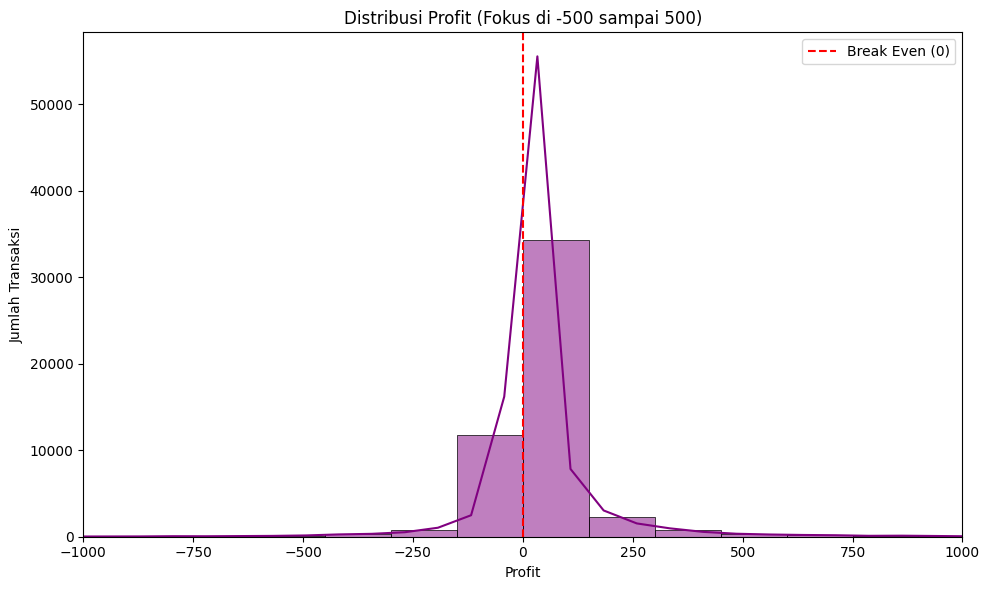

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(df['profit'], bins=100, kde=True, color='purple')
plt.title('Distribusi Profit (Fokus di -500 sampai 500)')
plt.xlabel('Profit')
plt.ylabel('Jumlah Transaksi')
plt.axvline(0, color='red', linestyle='--', label='Break Even (0)')
plt.xlim(-1000, 1000)
plt.legend()
plt.tight_layout()
plt.show()



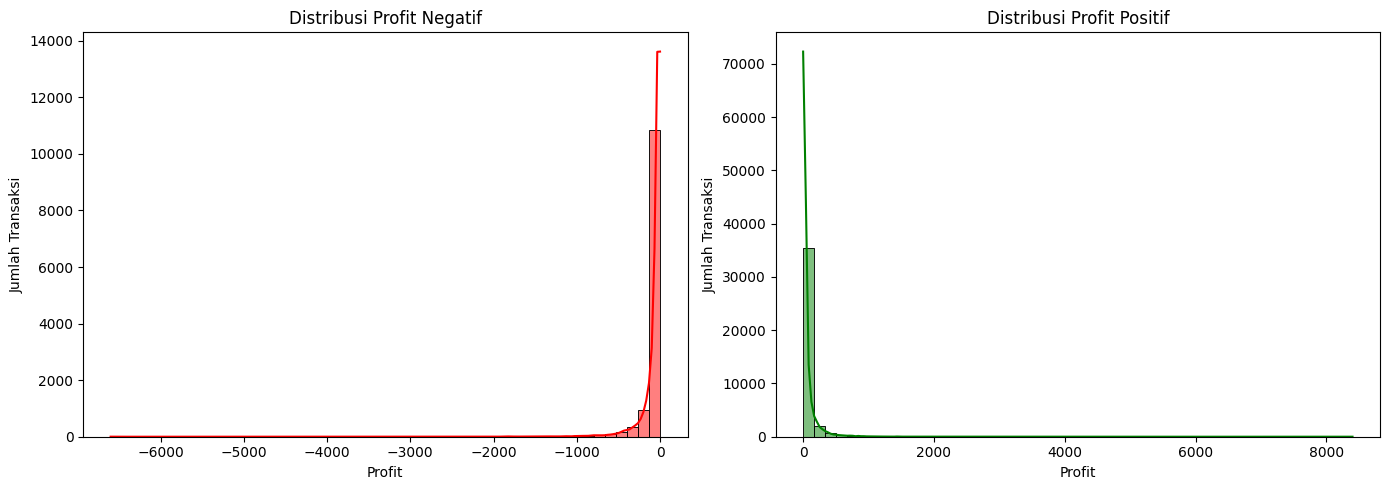

In [ ]:
profit_negatif = df[df['profit'] < 0]['profit']
profit_positif = df[df['profit'] >= 0]['profit']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(profit_negatif, bins=50, kde=True, color='red', ax=axes[0])
axes[0].set_title('Distribusi Profit Negatif')
axes[0].set_xlabel('Profit')
axes[0].set_ylabel('Jumlah Transaksi')

sns.histplot(profit_positif, bins=50, kde=True, color='green', ax=axes[1])
axes[1].set_title('Distribusi Profit Positif')
axes[1].set_xlabel('Profit')
axes[1].set_ylabel('Jumlah Transaksi')

plt.tight_layout()
plt.show()


### Korelasi Diskon Terhadap Profit

C:\Users\71486\AppData\Local\Temp\ipykernel_24240\2153554504.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


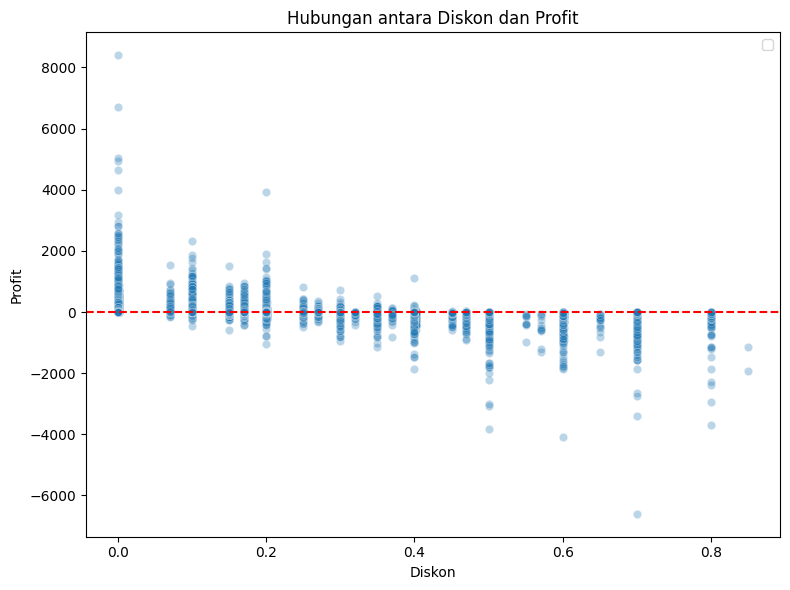

In [91]:
df_grouped = df.groupby('discount')['sales'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='discount', y='profit', alpha=0.3)
# sns.lineplot(data=df_grouped, x='discount', y='sales', color='orange', label='Total Sales')
plt.axhline(0, color='red', linestyle='--')
plt.title('Hubungan antara Diskon dan Profit')
plt.xlabel('Diskon')
plt.ylabel('Profit')
plt.legend()
plt.tight_layout()
plt.show()
